## Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycebox.ice import ice, ice_plot
import shap
from subprocess import call
from IPython.display import Image
from lime import lime_tabular, lime_text

from lazypredict import Supervised
from lazypredict.Supervised import LazyClassifier

import sklearn
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from tune_sklearn import TuneGridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [6]:
# Load data
data = pd.read_csv("../data/processed/dataset-phishing-domain-detection-cybersecurity/dataset_cybersecurity_michelle.csv")
data.head(5)

Unnamed: 0  qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_at_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  \
0           0            1               0                  0              1                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          13               1                  0                     0              0                  1              7             0                     0                  0                     0   
1           1            2               5                  4              2                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1         329               2                  0                     0              0                  8             24             0                     0                  0                     5   
2           2            2               0                  0              0                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          24               2                  0                     0              0                  7             24             0                     0                 -1                    -1   
3           3            1               1                  0              2                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          23               1                  1                     0              0                  5             17             0                     0                  0                     0   
4           4            2               1                  0              0                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          23               2                  1                     0              0                  6             23             0                     0                 -1                    -1   

   qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_directory  qty_comma_directory  qty_plus_directory  qty_asterisk_directory  qty_hashtag_directory  qty_dollar_directory  qty_percent_directory  directory_length  qty_dot_file  qty_hyphen_file  qty_underline_file  qty_slash_file  qty_questionmark_file  qty_equal_file  qty_at_file  qty_and_file  \
0                        0                    1                           0                    0                 0                  0                          0                    0                    0                    0                   0                       0                      0                     0                      0                 6             0                0                   0               0                      0               0            0             0   
1                        4        

In [7]:
# Overview of data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  129698 non-null  int64  
 1   qty_dot_url                 129698 non-null  int64  
 2   qty_hyphen_url              129698 non-null  int64  
 3   qty_underline_url           129698 non-null  int64  
 4   qty_slash_url               129698 non-null  int64  
 5   qty_questionmark_url        129698 non-null  int64  
 6   qty_equal_url               129698 non-null  int64  
 7   qty_at_url                  129698 non-null  int64  
 8   qty_and_url                 129698 non-null  int64  
 9   qty_exclamation_url         129698 non-null  int64  
 10  qty_space_url               129698 non-null  int64  
 11  qty_tilde_url               129698 non-null  int64  
 12  qty_comma_url               129698 non-null  int64  
 13  qty_plus_url 

Unnamed: 0  qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_at_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  \
count  129698.000   129698.000      129698.000         129698.000     129698.000            129698.000     129698.000  129698.000   129698.000           129698.000     129698.000     129698.000     129698.000    129698.000        129698.000       129698.000      129698.000       129698.000   129698.000  129698.000      129698.000         129698.000            129698.000     129698.000         129698.000     129698.000    129698.000            129698.000         129698.000   
mean    64848.500        2.221           0.370              0.132          1.490                 0.011          0.240       0.026        0.164                0.004          0.001          0.004          0.002         0.003             0.005            0.001           0.002            0.124        1.054      39.098           1.848              0.120                 0.001          0.000              5.439         18.402         0.003                 0.004             -0.213   
std     37440.732        1.315           1.200              0.706          1.964                 0.124          1.027       0.293        0.992                0.098          0.081          0.084          0.077         0.125             0.336            0.068           0.102            1.892        0.272      49.774           0.738              0.436                 0.029          0.003              2.596          6.838         0.052                 0.065              0.928   
min         0.000        1.000           0.000              0.000          0.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        0.000       4.000           0.000              0.000                 0.000          0.000              0.000          4.000         0.000                 0.000             -1.000   
25%     32424.250        2.000           0.000              0.000          0.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        1.000      17.000           1.000              0.000                 0.000          0.000              4.000         14.000         0.000                 0.000             -1.000   
50%     64848.500        2.000           0.000              0.000          1.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        1.000      23.000           2.000              0.000                 0.000          0.000              5.000         17.000         0.000                 0.000              0.000   
75%     97272.750        2.000           0.000              0.000          3.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        1.000      43.000           2.000              0.000                 0.000          0.000              7.000         22.000         0.000                 0.000              0.000   
max    129697.000       24.000          35.000             21.000         44.000                 9.000         23.000      43.000       26.000               10.000    

In [8]:
# Check for missing values
data.isnull().sum()
any(data<0)
# data.dropna(inplace=True)
# data.fillna(data.mean(), inplace=True)

True

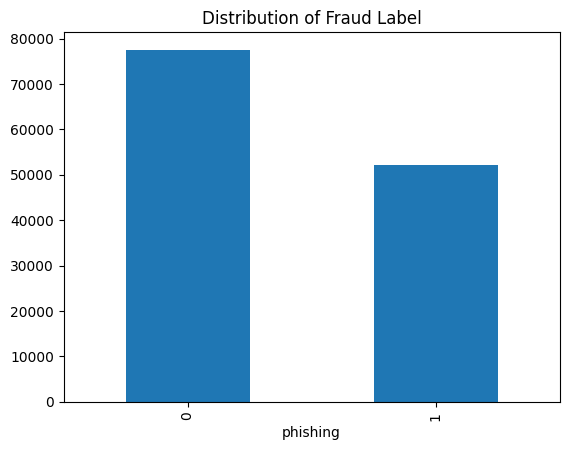

In [9]:
# Distribution of fraud label

# numerical_column = "time_response"
# category_columns = data.columns.drop("time_response")

data["phishing"].value_counts().sort_index().plot.bar(x="Target Value", y="Number of Occurrences", title="Distribution of Fraud Label")
plt.show()

In [10]:
# # Histogram
# plt.hist(data["numerical_column"], bins=20, color="skyblue", edgecolor="black")
# plt.title("Histogram of Numerical Column")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

# # Box plot
# plt.boxplot(data["numerical_column"])
# plt.title("Box plot of Numerical Column")
# plt.ylabel("Value")
# plt.show()

# # Scatter plot
# plt.scatter(data["numerical_column1"], data["numerical_column2"], color="green")
# plt.title("Scatter plot of Numerical Column1 vs Numerical Column2")
# plt.xlabel("Numerical Column1")
# plt.ylabel("Numerical Column2")
# plt.show()

# # Line plot
# plt.plot(data["index_column"], data["numerical_column"], marker="o", color="blue", linestyle="-")
# plt.title("Line plot of Numerical Column over Index Column")
# plt.xlabel("Index")
# plt.ylabel("Numerical Column")
# plt.show()

# # Bar plot
# plt.bar(data["category_column"], data["numerical_column"], color="orange")
# plt.title("Bar plot of Numerical Column across Categories")
# plt.xlabel("Category")
# plt.ylabel("Numerical Column")
# plt.xticks(rotation=45)
# plt.show()

In [11]:
# Remove redundant column if min==max
remove_cols = []
for col in data.columns:
    if data[col].min() == data[col].max():
        remove_cols.append(col)
data = data.drop(remove_cols, axis=1)



Further feature selection could be done after evaluating feature importance

In [12]:
# Select all columns except the last one
cols_to_scale = data.columns[:-1]

# Apply the operation to selected columns
data[cols_to_scale] = (data[cols_to_scale] - data[cols_to_scale].min()) / \
                      (data[cols_to_scale].max() - data[cols_to_scale].min())
data.isnull().sum()

Unnamed: 0                    0
qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slas

In [13]:
# Overview of data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  129698 non-null  float64
 1   qty_dot_url                 129698 non-null  float64
 2   qty_hyphen_url              129698 non-null  float64
 3   qty_underline_url           129698 non-null  float64
 4   qty_slash_url               129698 non-null  float64
 5   qty_questionmark_url        129698 non-null  float64
 6   qty_equal_url               129698 non-null  float64
 7   qty_at_url                  129698 non-null  float64
 8   qty_and_url                 129698 non-null  float64
 9   qty_exclamation_url         129698 non-null  float64
 10  qty_space_url               129698 non-null  float64
 11  qty_tilde_url               129698 non-null  float64
 12  qty_comma_url               129698 non-null  float64
 13  qty_plus_url 

Unnamed: 0  qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_at_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  \
count  129698.000   129698.000      129698.000         129698.000     129698.000            129698.000     129698.000  129698.000   129698.000           129698.000     129698.000     129698.000     129698.000    129698.000        129698.000       129698.000      129698.000       129698.000   129698.000  129698.000      129698.000         129698.000            129698.000     129698.000         129698.000     129698.000    129698.000            129698.000         129698.000   
mean        0.500        0.053           0.011              0.006          0.034                 0.001          0.010       0.001        0.006                0.000          0.000          0.001          0.000         0.000             0.000            0.000           0.000            0.001        0.088       0.008           0.088              0.011                 0.000          0.000              0.089          0.063         0.003                 0.004              0.039   
std         0.289        0.057           0.034              0.034          0.045                 0.014          0.045       0.007        0.038                0.010          0.009          0.017          0.007         0.007             0.006            0.005           0.010            0.011        0.023       0.012           0.035              0.040                 0.010          0.003              0.043          0.030         0.052                 0.065              0.046   
min         0.000        0.000           0.000              0.000          0.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        0.000       0.000           0.000              0.000                 0.000          0.000              0.000          0.000         0.000                 0.000              0.000   
25%         0.250        0.043           0.000              0.000          0.000                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        0.083       0.003           0.048              0.000                 0.000          0.000              0.066          0.044         0.000                 0.000              0.000   
50%         0.500        0.043           0.000              0.000          0.023                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        0.083       0.005           0.095              0.000                 0.000          0.000              0.082          0.057         0.000                 0.000              0.050   
75%         0.750        0.043           0.000              0.000          0.068                 0.000          0.000       0.000        0.000                0.000          0.000          0.000          0.000         0.000             0.000            0.000           0.000            0.000        0.083       0.009           0.095              0.000                 0.000          0.000              0.115          0.079         0.000                 0.000              0.050   
max         1.000        1.000           1.000              1.000          1.000                 1.000          1.000       1.000        1.000                1.000    

## Model Fitting

In [14]:
# Train test split
X = data.drop("phishing", axis=1)
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=data["phishing"])

Lazy prediction runs multiple classification models.

In [15]:
# List all claasifiers in lazy prediction
Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [16]:
# Remove problematic/bad performance classifiers from Supervised.CLASSIFIERS
Supervised.CLASSIFIERS = [classifier for classifier in Supervised.CLASSIFIERS
                          if classifier[1] not in [
                              sklearn.svm.NuSVC,
                              sklearn.svm.SVC,
                              sklearn.svm.LinearSVC,
                              sklearn.calibration.CalibratedClassifierCV
                          ]]



In [17]:
# Lazy prediction
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, classifiers="all" ) # verbose set as 1 to monitor progress
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  4%|▍         | 1/25 [00:11<04:40, 11.67s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9265227447956823, 'Balanced Accuracy': 0.9231239206302253, 'ROC AUC': 0.9231239206302253, 'F1 Score': 0.9264877067301567, 'Time taken': 11.668814659118652}


  8%|▊         | 2/25 [00:26<05:06, 13.35s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9815343099460293, 'Balanced Accuracy': 0.9798960285299565, 'ROC AUC': 0.9798960285299565, 'F1 Score': 0.9815172371195638, 'Time taken': 14.519697666168213}


 12%|█▏        | 3/25 [00:26<02:46,  7.58s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.7232186794281006}


 16%|█▌        | 4/25 [00:27<01:40,  4.77s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 20%|██        | 5/25 [00:30<01:20,  4.05s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9750963762528913, 'Balanced Accuracy': 0.9740726063921408, 'ROC AUC': 0.9740726063921408, 'F1 Score': 0.9750955938782929, 'Time taken': 2.7659506797790527}


 24%|██▍       | 6/25 [00:30<00:54,  2.88s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.5978797224363916, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.44741810973803947, 'Time taken': 0.6121833324432373}


 28%|██▊       | 7/25 [00:31<00:39,  2.18s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9601387818041635, 'Balanced Accuracy': 0.9588485578424011, 'ROC AUC': 0.9588485578424011, 'F1 Score': 0.960150572433878, 'Time taken': 0.7369809150695801}


 32%|███▏      | 8/25 [00:46<01:44,  6.17s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9848882035466461, 'Balanced Accuracy': 0.9838622591776415, 'ROC AUC': 0.9838622591776416, 'F1 Score': 0.9848817262027487, 'Time taken': 14.72636103630066}


 36%|███▌      | 9/25 [00:47<01:11,  4.50s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7288743253662298, 'Balanced Accuracy': 0.6700366595133089, 'ROC AUC': 0.6700366595133088, 'F1 Score': 0.6949262531145344, 'Time taken': 0.8177449703216553}


 40%|████      | 10/25 [00:55<01:24,  5.65s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9535080956052429, 'Balanced Accuracy': 0.9514043320790618, 'ROC AUC': 0.9514043320790619, 'F1 Score': 0.953496341289837, 'Time taken': 8.214248895645142}


 44%|████▍     | 11/25 [00:55<00:57,  4.08s/it]

LabelPropagation model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 48%|████▊     | 12/25 [00:56<00:38,  3.00s/it]

LabelSpreading model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 52%|█████▏    | 13/25 [00:58<00:31,  2.67s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9031225905936777, 'Balanced Accuracy': 0.9109468409704111, 'ROC AUC': 0.9109468409704111, 'F1 Score': 0.9039070039404197, 'Time taken': 1.905458927154541}


 56%|█████▌    | 14/25 [01:00<00:27,  2.49s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9223592906707787, 'Balanced Accuracy': 0.9210388994910004, 'ROC AUC': 0.9210388994910004, 'F1 Score': 0.9224904035742327, 'Time taken': 2.091996431350708}


 60%|██████    | 15/25 [01:00<00:19,  1.93s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.6170265674591064}


 64%|██████▍   | 16/25 [01:01<00:14,  1.61s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.906360832690825, 'Balanced Accuracy': 0.9074712349846201, 'ROC AUC': 0.9074712349846202, 'F1 Score': 0.906755538031652, 'Time taken': 0.8706541061401367}


 68%|██████▊   | 17/25 [01:02<00:11,  1.40s/it]

{'Model': 'Perceptron', 'Accuracy': 0.8889745566692367, 'Balanced Accuracy': 0.8797006601397617, 'ROC AUC': 0.8797006601397617, 'F1 Score': 0.8883643132900917, 'Time taken': 0.8925676345825195}


 72%|███████▏  | 18/25 [01:04<00:10,  1.45s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6983808789514264, 'Balanced Accuracy': 0.6260469836203173, 'ROC AUC': 0.6260469836203172, 'F1 Score': 0.6403570200319177, 'Time taken': 1.5735313892364502}


 76%|███████▌  | 19/25 [01:21<00:37,  6.17s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9837702390131071, 'Balanced Accuracy': 0.9824878666355443, 'ROC AUC': 0.9824878666355443, 'F1 Score': 0.9837597448018144, 'Time taken': 17.180532217025757}


 80%|████████  | 20/25 [01:22<00:22,  4.55s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9034309946029299, 'Balanced Accuracy': 0.9111576716360011, 'ROC AUC': 0.9111576716360011, 'F1 Score': 0.9042086990855752, 'Time taken': 0.7502546310424805}


 84%|████████▍ | 21/25 [01:23<00:14,  3.70s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9033538936006168, 'Balanced Accuracy': 0.911093192946208, 'ROC AUC': 0.911093192946208, 'F1 Score': 0.9041328247258698, 'Time taken': 1.7435352802276611}


 88%|████████▊ | 22/25 [01:25<00:09,  3.05s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9215882806476484, 'Balanced Accuracy': 0.9202842497080455, 'ROC AUC': 0.9202842497080455, 'F1 Score': 0.9217240307497222, 'Time taken': 1.5223338603973389}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 96%|█████████▌| 24/25 [01:26<00:01,  1.92s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9699691595990748, 'Balanced Accuracy': 0.9685919764834949, 'ROC AUC': 0.9685919764834949, 'F1 Score': 0.9699637128412371, 'Time taken': 1.200005292892456}
[LightGBM] [Info] Number of positive: 41721, number of negative: 62037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3446
[LightGBM] [Info] Number of data points in the train set: 103758, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402099 -> initscore=-0.396726
[LightGBM] [Info] Start training from score -0.396726


100%|██████████| 25/25 [01:28<00:00,  3.53s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9636083269082498, 'Balanced Accuracy': 0.9622209398189067, 'ROC AUC': 0.9622209398189068, 'F1 Score': 0.9636106076481142, 'Time taken': 1.4751689434051514}


In [18]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
ExtraTreesClassifier              0.985              0.984    0.984     0.985      14.726
RandomForestClassifier            0.984              0.982    0.982     0.984      17.181
BaggingClassifier                 0.982              0.980    0.980     0.982      14.520
DecisionTreeClassifier            0.975              0.974    0.974     0.975       2.766
XGBClassifier                     0.970              0.969    0.969     0.970       1.200
LGBMClassifier                    0.964              0.962    0.962     0.964       1.475
ExtraTreeClassifier               0.960              0.959    0.959     0.960       0.737
KNeighborsClassifier              0.954              0.951    0.951     0.953       8.214
AdaBoostClassifier                0.927              0.923    0.923     0.926      11.669
LogisticRegression                0.922              0.921    0.921     0.922       2.092
SGDClassifier                     0.922              0.920    0.920     0.922       1.522
RidgeClassifier                   0.903              0.911    0.911     0.904       0.750
RidgeClassifierCV                 0.903              0.911    0.911     0.904       1.744
LinearDiscriminantAnalysis        0.903              0.911    0.911     0.904       1.905
PassiveAggressiveClassifier       0.906              0.907    0.907     0.907       0.871
Perceptron                        0.889              0.880    0.880     0.888       0.893
NearestCentroid                   0.840              0.862    0.862     0.842       0.617
BernoulliNB                       0.840              0.862    0.862     0.842       0.723
GaussianNB                        0.729              0.670    0.670     0.695       0.818
QuadraticDiscriminantAnalysis     0.698              0.626    0.626     0.640       1.574
DummyClassifier                   0.598              0.500    0.500     0.447       0.612

Through lazy prediction, the best performing models are **RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, DecisionTreeClassifier**

In [19]:
# Rf Classifier
clf = RandomForestClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.9839244410177332
Recall: 0.97632058287796


Let's experiment if replacing -1 helps the performance

In [20]:
# Create a new DataFrame 'cleaned_df' with -1 replaced by mean
cleaned_data = data.copy()  # Make a copy of the original DataFrame

# Replace -1 with the mean of each column
for col in cleaned_data .columns[:-1]:
    if -1 in cleaned_data[col].values:
        mean_val = cleaned_data [col][cleaned_data[col] != -1].mean()
        cleaned_data[col] = cleaned_data[col].replace(to_replace=-1, value=mean_val)

# Train test split
clean_X = cleaned_data.drop("phishing", axis=1)[:100]
clean_y = cleaned_data["phishing"][:100]
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, test_size=0.2, random_state=20, stratify=cleaned_data["phishing"][:100])

# Rf Classifier
clean_clf = RandomForestClassifier().fit(clean_X_train, clean_y_train)

# Make predictions on the test set
clean_y_pred = clean_clf.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, clean_y_pred)
recall = recall_score(clean_y_test, clean_y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)


Accuracy: 0.9
Recall: 0.8181818181818182


In [21]:
# Hyperparameters
print("max_depth: ", max((e.tree_.max_depth for e in clf.estimators_)))
print("min_depth: ", min((e.tree_.max_depth for e in clf.estimators_)))
print("max_depth: ", clf.get_params())

max_depth:  47
min_depth:  33
max_depth:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Explainer expected value: [0.429125 0.570875]


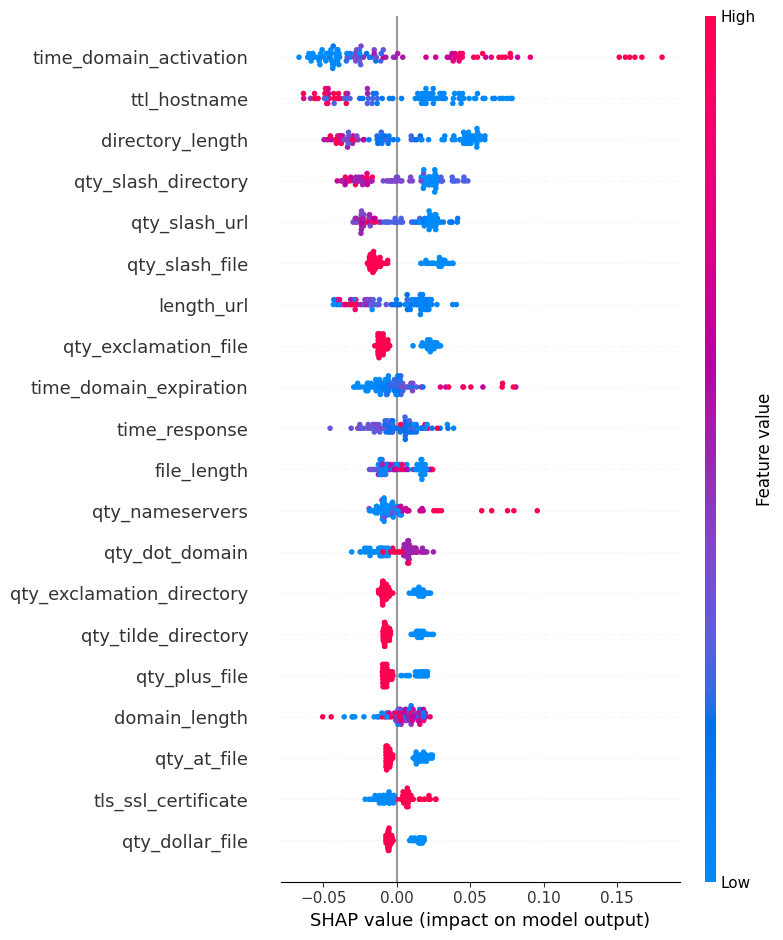

In [22]:
#Construct SHAP Explainer
explainer = shap.Explainer(clean_clf)  
shap_values = explainer.shap_values(clean_X[:100])
shap_values = shap_values[..., 0]
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")
#
select = range(100)
features = clean_X.iloc[select]
features_display = clean_X.loc[features.index]
shap.summary_plot(shap_values, clean_X)

In [23]:
#SHAP Decision Plot
#shap.decision_plot(expected_value[0], shap_values[0], features_display.iloc[0], link='logit')
#shap.decision_plot(expected_value[1], shap_values[50], features_display.iloc[50], link='logit')

In [24]:
#LIME tabular explainer
explainer = lime_tabular.LimeTabularExplainer(clean_X_train.values,
                                              feature_names=clean_X_train.columns,
                                              class_names=['Not Phishing', 'Phishing'],
                                              discretize_continuous=True)


In [25]:

#  Generate 3 random indices
idx = np.random.randint(0, clean_X_test.shape[0], size=3)

# Extract instances and true classes using the indices
instances = clean_X_test.iloc[idx].values
true_classes = clean_y_test.iloc[idx]

# Loop through the instances and explain each prediction
for i, instance in enumerate(instances):
    true_class = true_classes.iloc[i]
    
    # Explain the prediction for this instance
    explanation = explainer.explain_instance(instance,
                                             clean_clf.predict_proba,
                                             num_features=6,
                                             top_labels=1)
    
    print(f'Instance {i+1}:')
    print('True Class:', 'Phishing' if true_class == 1 else 'Not Phishing')
    print('Predicted Class:', 'Phishing' if clean_clf.predict([instance])[0] == 1 else 'Not Phishing')
    print('Explanation for Predicted Class:')
    explanation.show_in_notebook()


Instance 1:
True Class: Phishing
Predicted Class: Phishing
Explanation for Predicted Class:


Instance 2:
True Class: Phishing
Predicted Class: Not Phishing
Explanation for Predicted Class:


Instance 3:
True Class: Not Phishing
Predicted Class: Not Phishing
Explanation for Predicted Class:


In [26]:
def predict_fn(X):
    # Predict probabilities for each row
    proba = clean_clf.predict_proba(X)
    # Return the probabilities of the positive class (assuming binary classification)
    return proba[:, 1]
# Using the predict_fn with the first row of clean_X
first_row_prediction = predict_fn(clean_X.iloc[[0]])

print("Predicted Probability of Positive Class for the First Row:")
print(first_row_prediction)


Predicted Probability of Positive Class for the First Row:
[0.86]


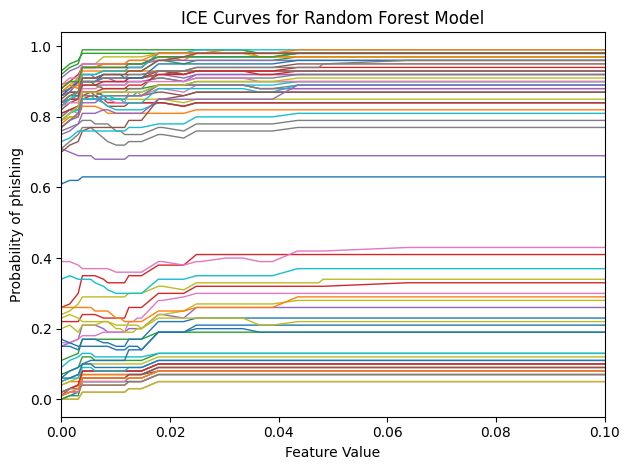

In [27]:
# List of column names
col_of_interest ="directory_length"


# Create ICE Data for the col_of_interest
ice_data = ice(clean_X_train, col_of_interest , predict_fn)


# Plot ICE Curves
fig, ax = plt.subplots()
ice_plot(ice_data, linewidth=1, ax=ax)
ax.set_xlabel("Feature Value")
ax.set_ylabel("Probability of phishing")
ax.set_title("ICE Curves for Random Forest Model")
ax.set_xlim(0, 0.1)  # Limit x-axis from 0 to 0.1
plt.tight_layout()
plt.show()

#### !! CAUTION: This cell takes long time to run !!

In [28]:
# Hyperparameter tuning

# param_grid = {
#     "estimator": [DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier()],
#     "base_estimator__max_depth" : [1, 2, 3, 4, 5],
#     "max_samples" : [0.05, 0.1, 0.2, 0.5]
# }

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [30, 50, 70],
    "min_samples_split": [2, 4, 6],
    "max_features": ["sqrt", "log2"]
}

model = RandomizedSearchCV(clean_clf, param_grid, cv=5, n_iter=20, verbose=1)
model.fit(clean_X_train, clean_y_train)

# Get the best hyperparameters
best_params = model.best_params_

# Make predictions on the test set
y_pred = model.predict(clean_X_test)
 
# Calculate accuracy
accuracy = accuracy_score(clean_y_test, y_pred)
recall = recall_score(clean_y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.95
Recall: 0.9090909090909091
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': 70}


## Evaluation

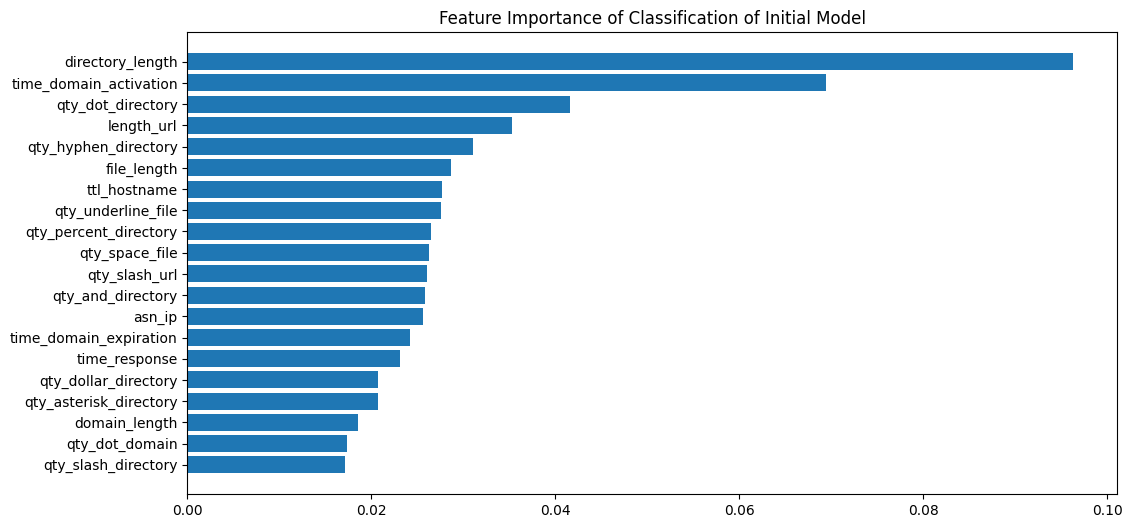

In [29]:
# Feature importance of initial model

# feature_importance = clf.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Initial Model")
plt.show()

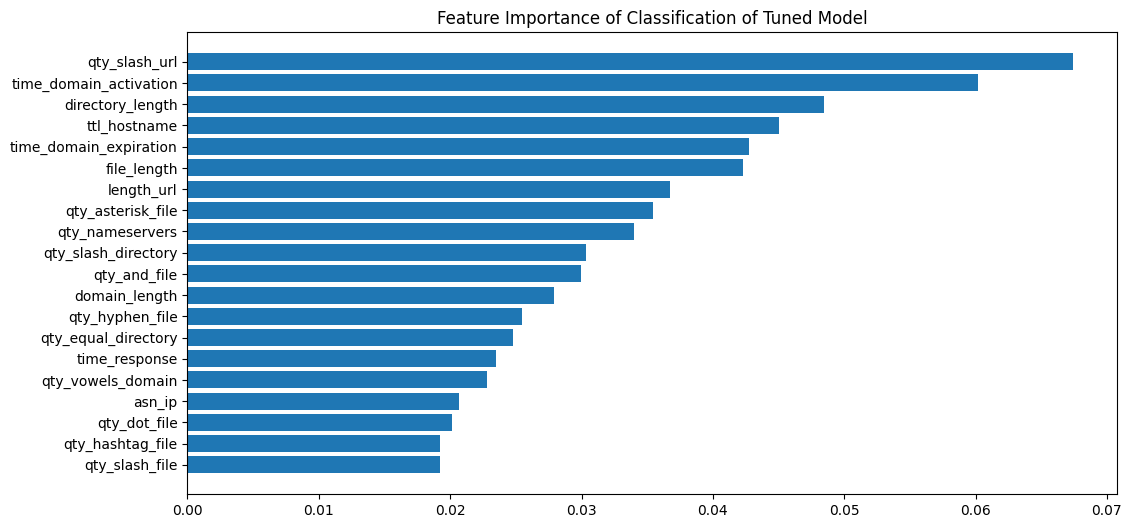

In [30]:
# Feature importance of tuned model

# feature_importance = model.feature_importances_
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.best_estimator_
], axis=0)
sorted_idx = np.argsort(feature_importances)[-20:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance of Classification of Tuned Model")
plt.show()

In [31]:
# Export tree as dot file

# for i in range(len(model.best_estimator_)):
#     export_graphviz(model.best_estimator_[i], out_file=f"visualization/tree_{i}.dot", 
#                 feature_names=cleaned_data.drop("phishing", axis=1).columns,
#                 class_names=["phishing"],
#                 filled=True,
#                 rounded=True, proportion=False, 
#                 precision=2, filled=True)

#     # Convert to png using system command (requires Graphviz)
#     # os.system('dot -Tpng tree.dot -o tree.png')
#     call(["dot", "-Tpng", f"tree_{i}.dot", "-o", f"tree_{i}.png", "-Gdpi=300"])

#     # Display in jupyter notebook
#     Image(filename = f"tree_{i}.png")

# Alternatively
# for i in range(len(model.best_estimator_)):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
#     tree.plot_tree(model.best_estimator_[i],
#                 feature_names=list(cleaned_data.columns.drop("phishing")), 
#                 class_names=["phishing"],
#                 filled=True, 
#                 rounded=True, proportion=False, 
#                 precision=2)
    
#     fig.savefig(f"visualization/tree_{i}.png")

## More visualization

In [32]:
from sklearn.utils.discovery import all_displays

displays = all_displays()
displays

[('CalibrationDisplay', sklearn.calibration.CalibrationDisplay),
 ('ConfusionMatrixDisplay',
  sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay),
 ('DecisionBoundaryDisplay',
  sklearn.inspection._plot.decision_boundary.DecisionBoundaryDisplay),
 ('DetCurveDisplay', sklearn.metrics._plot.det_curve.DetCurveDisplay),
 ('LearningCurveDisplay', sklearn.model_selection._plot.LearningCurveDisplay),
 ('PartialDependenceDisplay',
  sklearn.inspection._plot.partial_dependence.PartialDependenceDisplay),
 ('PrecisionRecallDisplay',
  sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay),
 ('PredictionErrorDisplay',
  sklearn.metrics._plot.regression.PredictionErrorDisplay),
 ('RocCurveDisplay', sklearn.metrics._plot.roc_curve.RocCurveDisplay),
 ('ValidationCurveDisplay',
  sklearn.model_selection._plot.ValidationCurveDisplay)]

## Confusion Matrix

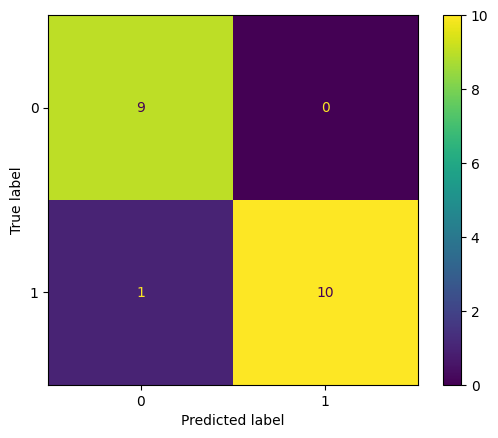

In [33]:
# Create the confusion matrix
cm = confusion_matrix(clean_y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

## Precision-Recall

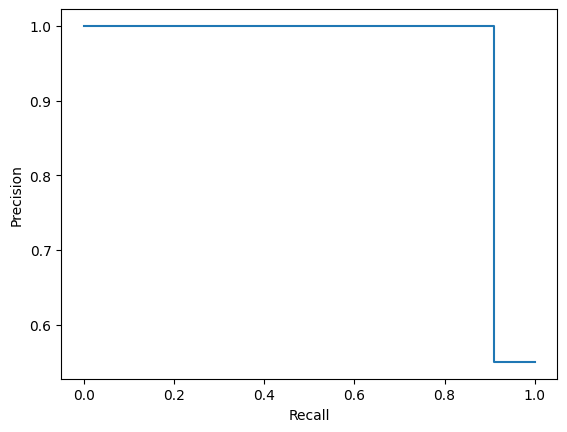

In [34]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(clean_y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

## ROC Curve

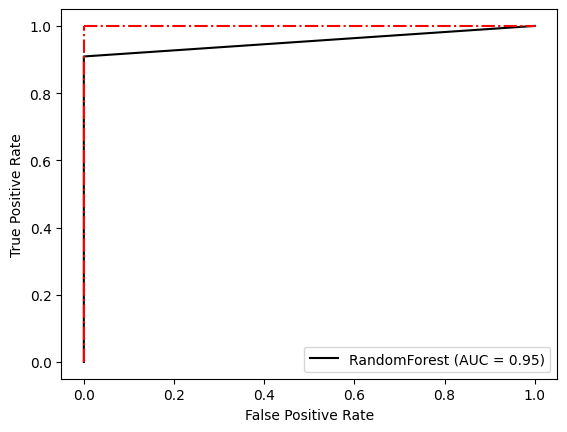

In [35]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(clean_y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="RandomForest")
display.plot(color='black', linestyle='-')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.plot([0, 0], [0, 1], color='red', linestyle='-.')
plt.plot([0, 1], [1, 1], color='red', linestyle='-.')
plt.show()

## Calibration Display

A perfectly calibrated model would have a calibration curve closely aligned with the 45-degree diagonal line on the plot. This line represents ideal calibration, where the **predicted probabilities match the observed frequencies**. Deviations from this diagonal line indicate either overconfidence or underconfidence in the model's predictions.

- Overconfidence: If the curve lies above the diagonal line, the model is overconfident. This means there are more instances with predicted probabilities close to 1 than there should be, and the model's confidence in its predictions is higher than the actual success rate.
- Underconfidence: If the curve lies below the diagonal line, the model is underconfident. In this case, instances with high predicted probabilities are less frequent than they should be and the model's confidence is lower than the actual success rate.

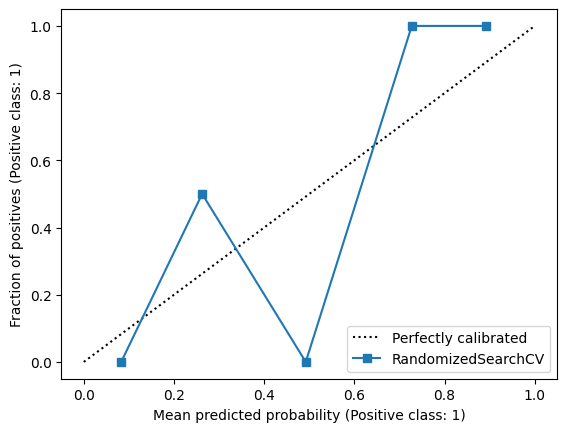

In [36]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(model, clean_X_test, clean_y_test)
plt.show()

## Decision Boundary

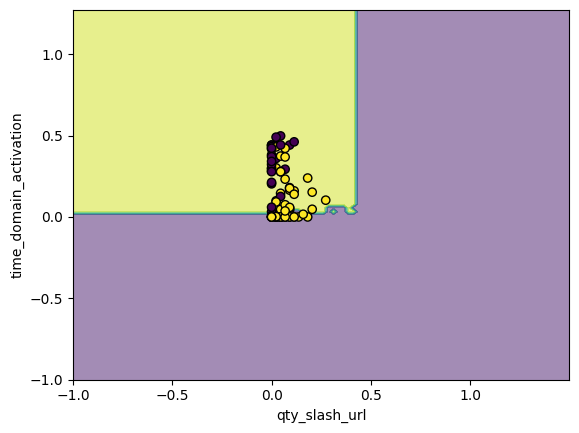

In [37]:
from sklearn.inspection import DecisionBoundaryDisplay

# Reconstruct best model
n_estimators = best_params["n_estimators"]
min_samples_split = best_params["min_samples_split"]
max_features = best_params["max_features"]
max_depth = best_params["max_depth"]
tree = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, max_features=max_features, max_depth=max_depth)

tree = tree.fit(clean_X_train[clean_X_train.columns[sorted_idx[-2:]]], clean_y_train)
display = DecisionBoundaryDisplay.from_estimator(
    tree, clean_X_train[clean_X_train.columns[sorted_idx[-2:]]], response_method="predict",
    xlabel=clean_X_train.columns[sorted_idx[-1]], ylabel=clean_X_train.columns[sorted_idx[-2]],
    alpha=0.5,
)
clean_df = pd.concat([clean_X_train, clean_y_train], axis=1)
samples = clean_df.sample(frac=0.001, replace=False, random_state=1)
display.ax_.scatter(clean_X_train[clean_X_train.columns[sorted_idx[-1]]], clean_X_train[clean_X_train.columns[sorted_idx[-2]]], c=clean_y_train, edgecolor="k")
plt.show()

## Learning Curve

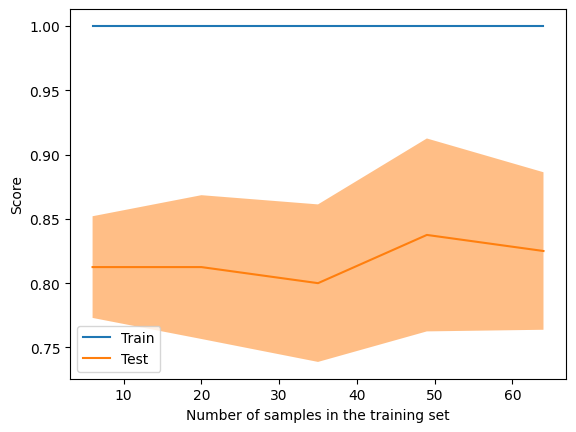

In [38]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, clean_X_train, clean_y_train)
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()